# Plotting tutorial

Some user input is required to be given in terms of astropy quantities (`astropy.unit.Quantity` objects). As such, we begin by importing astropy units.
Some matplotlib functions are also useful, but not nessecary.

In [1]:
import astropy.units as u
import matplotlib.pyplot as plt

## Loading a test data

The cosmoglobe plotting tools can be invoked on many different types of data
sets. Some of the functions are generalized to take arrays, cosmoglobe sky model
objects or strings of fits files.

In [2]:
import cosmoglobe
chain = cosmoglobe.get_test_chain()
include_components=["cmb","synch", "ff", "ame", "dust", "radio"]
model = cosmoglobe.model_from_chain(chain, nside=256, components=include_components)
model.remove_dipole(30 * u.deg) # Remove dipole on cmb component
dust = model.components["dust"].amp # Fetch the dust amplitude from the model object


Initializing model from cached chainfile


radio: 100%|█████████████████████████████████| 6/6 [00:05<00:00,  1.02it/s]


(<matplotlib.collections.QuadMesh at 0x7feb555367f0>,
 {'data': array([30.30987493, -0.43109241,  8.45230192, ...,  6.66705892,
          9.97193761, 11.8158503 ]),
  'comp': None,
  'sig': 0,
  'rlabel': None,
  'llabel': None,
  'unit': None,
  'ticks': [-3.522202903472494, 4645.392197172208],
  'min': None,
  'max': None,
  'rng': None,
  'norm': None,
  'norm_dict': None,
  'cmap': 'planck',
  'freq_ref': None,
  'width': 8.302200083022,
  'nside': 256,
  'ticklabels': ['$-3.52$', '$4645$']})

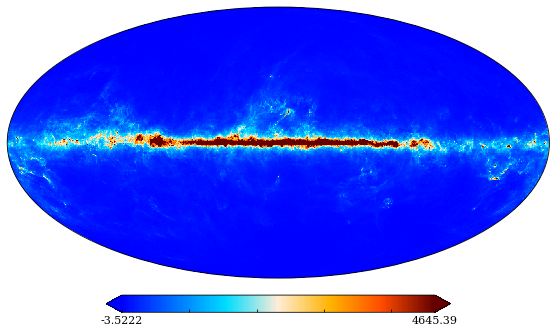

In [3]:
cosmoglobe.plot(dust)

A handy feature with the cosmoglobe map plotter is that it auto-formats specific components.
If the component is specified to be "dust", it will apply a suitible range, colormap and label.

(<matplotlib.collections.QuadMesh at 0x7feb545c5610>,
 {'data': array([30.30987493, -0.43109241,  8.45230192, ...,  6.66705892,
          9.97193761, 11.8158503 ]),
  'comp': 'dust',
  'sig': 0,
  'rlabel': '$A_d$',
  'llabel': '$I$',
  'unit': '$\\mu\\mathrm{K}_{\\mathrm{RJ}}$',
  'ticks': [30, 300, 3000],
  'min': None,
  'max': None,
  'rng': None,
  'norm': 'symlog2',
  'norm_dict': {'linthresh': 5},
  'cmap': 'sunburst',
  'freq_ref': 545.0,
  'width': 8.302200083022,
  'nside': 256,
  'ticklabels': ['$30$', '$300$', '$3000$']})

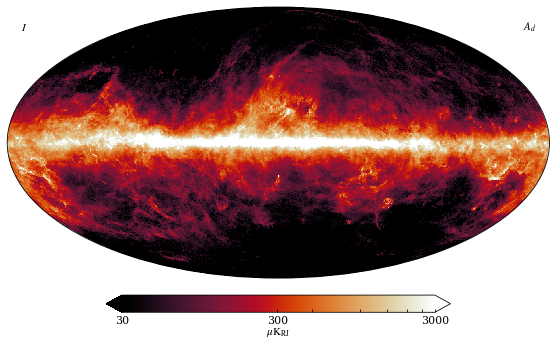

In [4]:
cosmoglobe.plot(dust, comp="dust",)

If the input data has polarization data in it, the stokes parameter can also be specified to the autoformatter


(<matplotlib.collections.QuadMesh at 0x7feb53896430>,
 {'data': array([ 2.61048442,  2.11811903, -0.90430579, ..., -6.73241148,
          0.47604929,  0.76062461]),
  'comp': 'dust',
  'sig': 2,
  'rlabel': '$A_d$',
  'llabel': '$U$',
  'unit': '$\\mu\\mathrm{K}_{\\mathrm{RJ}}$',
  'ticks': [-100, 0, 100],
  'min': None,
  'max': None,
  'rng': None,
  'norm': 'symlog2',
  'norm_dict': {'linthresh': 5},
  'cmap': 'iceburn',
  'freq_ref': 353.0,
  'width': 8.302200083022,
  'nside': 256,
  'ticklabels': ['$-100$', '$0$', '$100$']})

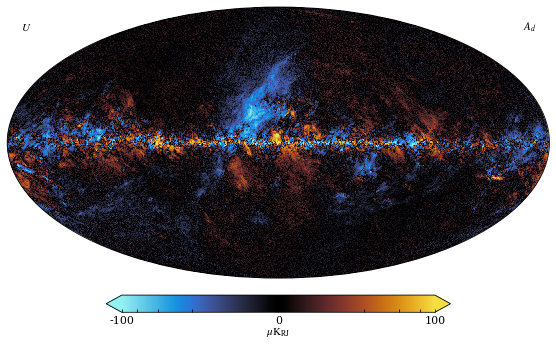

In [5]:
import healpy as hp
cosmoglobe.plot(dust, comp="dust", sig="U",)


From here, you can go crazy with the plotting options, and any specified values will overwrite the autoformatting.

Ud_grading map

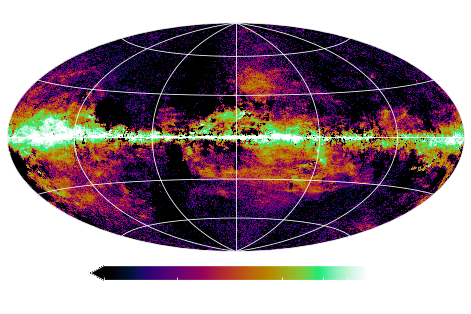

In [6]:
cosmoglobe.plot(dust, sig="Q", ticks=[0, 3.14, None], norm="symlog2", unit=u.uK, fwhm=14*u.arcmin, nside=512, cmap="chroma", llabel="Left", rlabel="Right", title="Cool figure", width=7, graticule=True, projection_type="hammer", graticule_color="white", xtick_label_color="white", ytick_label_color="white", darkmode=True)
plt.gca().set_facecolor('black')

As already mentioned, the cosmoglobe plotter can take several different input types.
Simply pass it the path to your fits file, and it will plot it.

When using the cosmoglobe model object, there are even more features!
For example, one can look at the sky at a specific frequency

(<matplotlib.collections.QuadMesh at 0x7feb59a70ca0>,
 {'data': array([-98.34570718, -45.16699422, -23.15560863, ...,  48.87456566,
          85.55209776,  66.59414259]),
  'comp': 'freqmap',
  'sig': 0,
  'rlabel': '$A_{70}$',
  'llabel': '$I$',
  'unit': '$\\mu\\mathrm{K}\\,@\\,70\\,\\mathrm{GHz}$',
  'ticks': [-1000.0, -100, 0, 100, 10000000.0],
  'min': None,
  'max': None,
  'rng': None,
  'norm': 'symlog2',
  'norm_dict': None,
  'cmap': 'planck_log',
  'freq_ref': <Quantity 70. GHz>,
  'width': 8.302200083022,
  'nside': 256,
  'ticklabels': ['$-1000$', '$-100$', '$0$', '$100$', '$10^{7}$']})

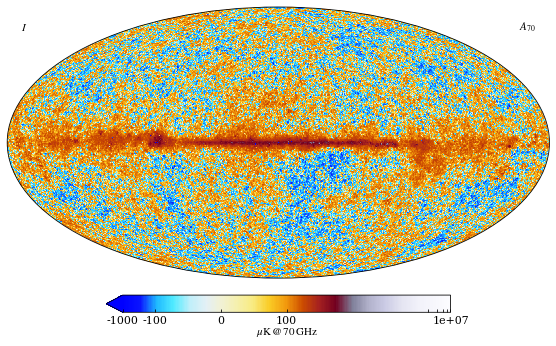

In [7]:
cosmoglobe.plot(model, freq=200*u.GHz)
cosmoglobe.plot(model, freq=200*u.GHz, sig="Q")

You can plot whatever component you like, and all of them have their own profile. 
Plot them all at the same time, even! I don't care:

[0.0, 201.31742628361408]

[0.0, 0.0]

[0.0, 0.0]

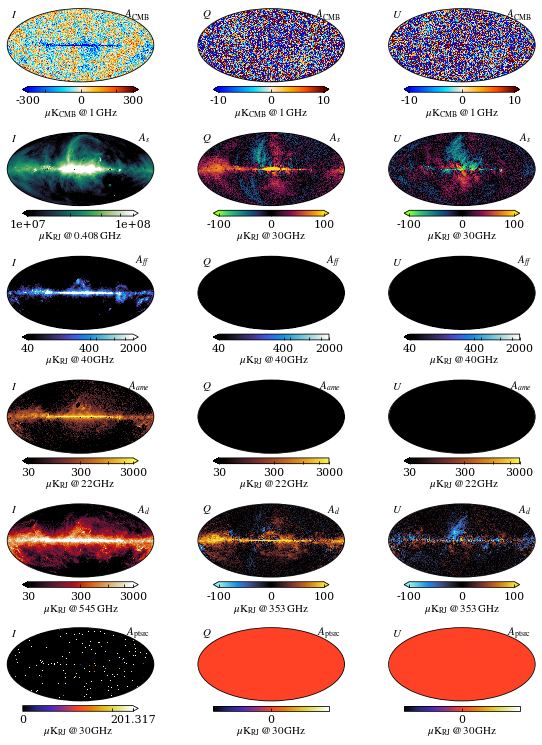

In [8]:
signals = ["I", "Q", "U"]
num=1
for comp in include_components:
    for sig in signals:
        sub = (len(include_components), len(signals), num)
        cosmoglobe.plot(model, comp=comp, sig=sig, sub=sub, width=15)
        num+=1
plt.tight_layout()

All these functions can be invoked with the command line as well, using "click" functionality.
This can be done by typing 
`cosmoglobe plot map.fits`

## Traceplot

Cosmoglobe comes with more than just sky-map plotting features.
It also allows the user to plot a quantity in a chain over Gibbs samples in a formatted way.

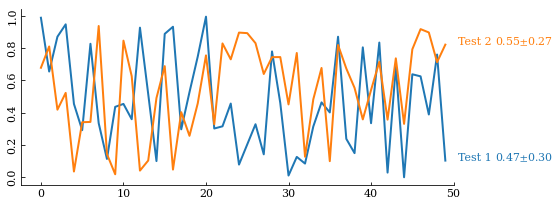

In [9]:
#cosmoglobe.trace(chain, figsize=(10,2), sig=0, labels=["Reg1","Reg2","Reg3","Reg4"], dataset="synch/beta_pixreg_val", ylabel=r"$\beta_s^T$")
import numpy as np
data = np.random.rand(50, 2)
cosmoglobe.trace(data, labels=["Test 1","Test 2",], )

## Histogram

Histograms of the same values are also useful and can be accessed through

(array([2.30421531e-06, 1.28011961e-06, 1.53614354e-06, 3.84035884e-06,
        6.14457415e-06, 6.14457415e-06, 9.72890907e-06, 1.53614354e-05,
        1.51054114e-05, 2.91867272e-05, 2.96987751e-05, 5.55571913e-05,
        7.78312726e-05, 1.21355339e-04, 1.92786014e-04, 3.28478693e-04,
        6.89472424e-04, 1.81828190e-03, 9.48747851e-03, 5.37353250e-02,
        6.92547272e-02, 2.77898607e-02, 1.19642539e-02, 6.13228500e-03,
        3.87927448e-03, 2.81933544e-03, 2.13523952e-03, 1.65980309e-03,
        1.32364368e-03, 1.09450227e-03, 9.75707170e-04, 8.61264477e-04,
        7.44773592e-04, 6.38011616e-04, 5.30993616e-04, 4.34472597e-04,
        3.69954569e-04, 3.09532923e-04, 2.42710679e-04, 2.12755880e-04]),
 array([-100.,  -95.,  -90.,  -85.,  -80.,  -75.,  -70.,  -65.,  -60.,
         -55.,  -50.,  -45.,  -40.,  -35.,  -30.,  -25.,  -20.,  -15.,
         -10.,   -5.,    0.,    5.,   10.,   15.,   20.,   25.,   30.,
          35.,   40.,   45.,   50.,   55.,   60.,   65.,   70.,  

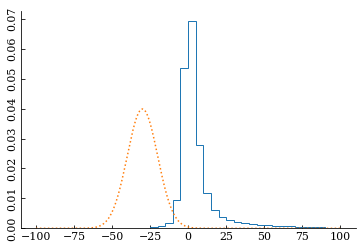

In [10]:
cosmoglobe.hist(dust[1].value, figsize=(6,4), range=(-100,100), bins=40, prior=(-30,10))

## Gnomonic view

Cosmoglobe also provides gnomonic view plotting

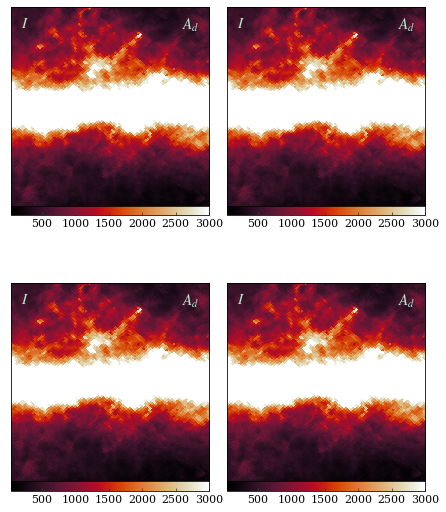

In [11]:
cosmoglobe.gnom(dust, comp="dust", norm="linear", sub=(2,2,1), fontsize={"title": 15,})
cosmoglobe.gnom(dust, comp="dust", norm="linear", sub=(2,2,2), fontsize={"title": 15,})
cosmoglobe.gnom(dust, comp="dust", norm="linear", sub=(2,2,3), fontsize={"title": 15,})
cosmoglobe.gnom(dust, comp="dust", norm="linear", sub=(2,2,4), fontsize={"title": 15,})

plt.tight_layout(pad=0.0,)

## Frequency spectrum

Another key feature of cosmoglobe is its ability to plot the full frequency spectrum of a given model.

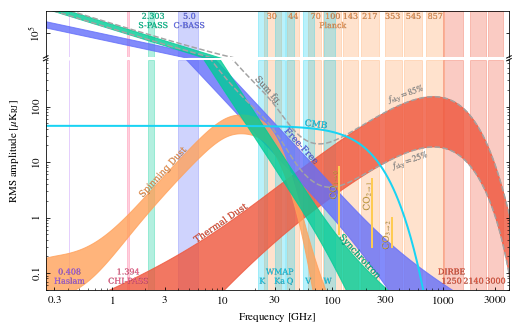

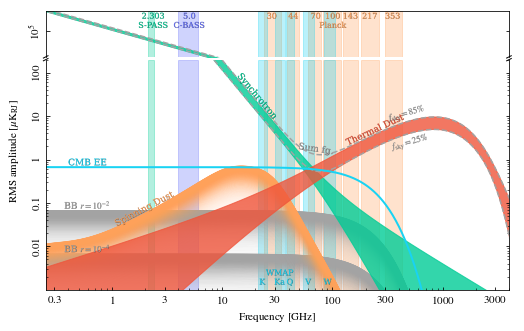

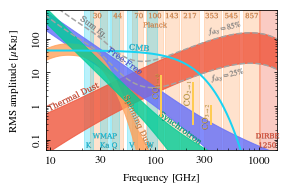

In [12]:
# Full page frequency spectrum in intensity and polarization
cosmoglobe.spec(model,)
cosmoglobe.spec(model,pol=True)
# Smaller version
cosmoglobe.spec(model, fraction=0.5, extend=False, comp_labelsize=8, band_labelsize=7, )

## Standalone colorbar

When writing papers it is often useful to have standalone colorbars. 
Cosmoglobe has this feature, just provide it with a colormap, ticks and a unit.

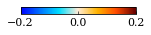

In [13]:
cosmoglobe.standalone_colorbar("planck", ticks=[-0.2,0,0.2], unit=r"$S/\sigma_S$", )